In [71]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms


In [72]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)

train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

In [73]:
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

model = SimpleNN()

In [74]:
X, y = next(iter(train_dataloader))
y_pred = model(X)
print(y_pred.shape) 

torch.Size([64, 10])


In [75]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=0.001)

In [76]:
def train_loop(model, trainloader, optimizer, criterion):
    model.train()
    running_loss = 0.0
    for X, y in trainloader:
        y_pred = model(X)
        loss = criterion(y_pred, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    return running_loss / len(trainloader)

def test_loop(model, testloader, criterion):
    model.eval() 
    running_loss = 0.0
    with torch.no_grad(): 
        for X, y in testloader:
            y_pred = model(X)
            loss = criterion(y_pred, y)
            running_loss += loss.item()
    return running_loss / len(testloader)


In [77]:
for i in range(10):
    train_loss = train_loop(model, train_dataloader, optimizer, criterion)
    test_loss = test_loop(model, test_dataloader, criterion)
    print(f'Epoch {i}, Train Loss: {train_loss}, Test Loss: {test_loss}')

Epoch 0, Train Loss: 0.38852721746208696, Test Loss: 0.22078275470549513
Epoch 1, Train Loss: 0.2003370063788474, Test Loss: 0.16482286382419098
Epoch 2, Train Loss: 0.14749822350167263, Test Loss: 0.15750226587543537
Epoch 3, Train Loss: 0.12118265480160523, Test Loss: 0.11363172790726682
Epoch 4, Train Loss: 0.10149148036477598, Test Loss: 0.11003867438126794
Epoch 5, Train Loss: 0.08914456305243988, Test Loss: 0.09815407421804703
Epoch 6, Train Loss: 0.07762796656518524, Test Loss: 0.09751806132255157
Epoch 7, Train Loss: 0.0728804813903957, Test Loss: 0.08643513117437873
Epoch 8, Train Loss: 0.0660835651376509, Test Loss: 0.08330021858134509
Epoch 9, Train Loss: 0.06139829201447065, Test Loss: 0.08999869301086544


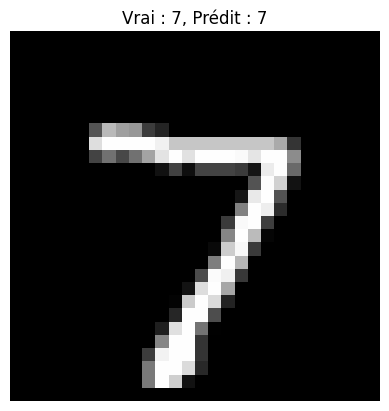

In [79]:
import matplotlib.pyplot as plt

X, y = next(iter(test_dataloader))
X_single = X[0].unsqueeze(0)
y_true = y[0].item()

model.eval()
with torch.no_grad():
    y_pred = model(X_single)
    y_pred_label = y_pred.argmax(dim=1).item()

plt.imshow(X_single.squeeze(0).squeeze(0), cmap="gray")
plt.title(f"Vrai : {y_true}, Prédit : {y_pred_label}")
plt.axis("off")
plt.show()